#Demonstrating some of the visuazation tools in nsaba

In [1]:
%pylab inline
from nsaba import *
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import itertools

Populating the interactive namespace from numpy and matplotlib


In [2]:
ns_path = "/Users/Torben/Documents/ABI analysis/current_data_new/"
#ns_path = '/Users/SP/Documents/'
aba_path = '/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/'
#aba_path = '/Users/SP/Documents/'
Nsaba.aba_load(aba_path)
Nsaba.ns_load(ns_path)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.


0

#Gathering data for two genes and two terms

In [4]:

term1 = 'attention'
term2 = 'alzheimer'
gene_entrez = [1139 , 1141] # CHRNA1 nicotinic receptor alpha 7 subunit gene and beta 2 subunit

# initializing 
A = Nsaba()
A.get_aba_ge(gene_entrez)
A.get_ns_act(term1, thresh=-1, method='knn')
A.get_ns_act(term2, thresh=-1, method='knn')

#Plotting gene expression of one gene

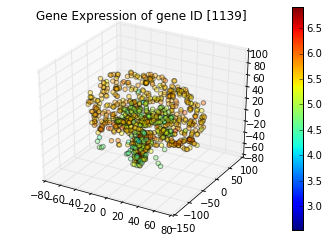

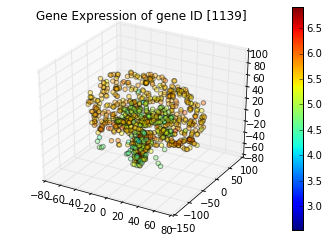

In [15]:
from nsaba.visualizer import NsabaVisualizer
V = NsabaVisualizer(A)
V.visualize_ge([gene_entrez[0]])

#Plotting activation of 1 term

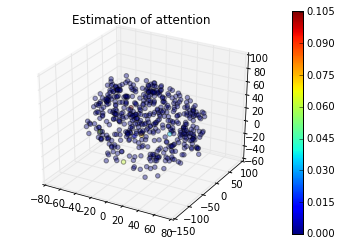

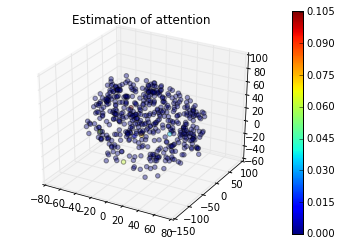

In [22]:
V.visualize_ns(term1,points = 500)

#Plotting the correlation between two genes

(array([[ 1.        ,  0.02904978],
        [ 0.02904978,  1.        ]]),
 [0.028271324882184139, 6.2065106860511241])

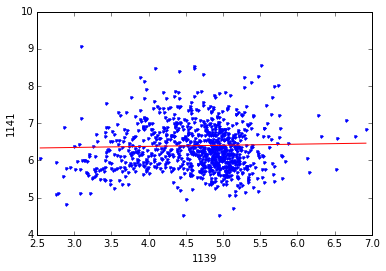

In [17]:
V.visualize_ge_ge(gene_entrez)

#Plotting correlation between two terms

(array([[ 1.        ,  0.00184433],
        [ 0.00184433,  1.        ]]),
 [0.0014312029651934533, 0.0039363807234279865])

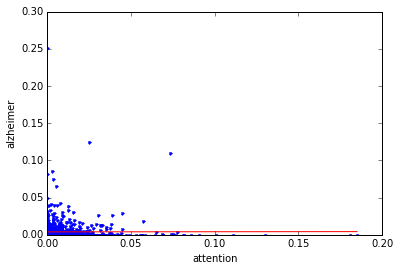

In [19]:
V.visualize_ns_ns(term1,term2)

#Correlating activation of one term with expression of one gene

(array([[ 1.        ,  0.07091598],
        [ 0.07091598,  1.        ]]),
 [0.0018194235044860054, 0.0016122973992796458])

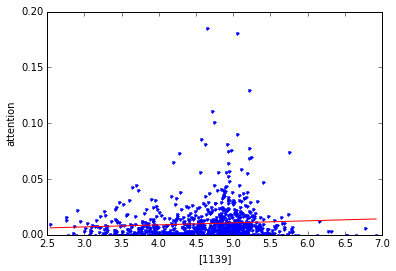

In [18]:
V.visualize_ns_ge(term1,[gene_entrez[0]])